# Preparing, manipulating and visualizing data in Python
This notebook contains an introduction to using NumPy, Pandas and Matplotlib for machine learning purposes.

## Imports
Let's begin by importing the external dependencies we need

In [145]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## NumPy
This module primarily concerns creating arrays of various dimensions and performing calculations and other operations on these in an effiecient manner. There is also a submodule for linear algebra algorithms and some simple statistical functions such mean, median and sum.

### Timing some functions
We can create a simple decorator function, allowing us to measure the time of other functions to run by prepending them with `@timer` (which is really just syntactic sugar for calling our function like this: `timer(our_function)(our_function_args)`, every time)

In [3]:
def timer(func):
    def do_timing(*args, **kwargs):
        start = time.time()
        func_ret = func(*args, **kwargs)
        end = time.time()
        print("{} took {:.3f}s to run".format(func.__name__, end-start))
        return func_ret
    return do_timing

Using the timer decorator we just created, we can examine how efficient NumPy really is compared to vanilla Python.

In [4]:
@timer
def sum_trad(upper):
    X = range(upper)
    Y = range(upper)
    Z = []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])

@timer
def sum_compr(upper):
    X = range(upper)
    Y = range(upper)
    Z = [x + y for (x, y) in zip(X, Y)]

@timer
def sum_np(upper):
    X = np.arange(upper)
    Y = np.arange(upper)
    Z = X + Y

In [5]:
upper = 10000000
sum_trad(upper)
sum_compr(upper)
sum_np(upper)

sum_trad took 1.762s to run
sum_compr took 0.638s to run
sum_np took 0.051s to run


### Creating arrays in NumPy
Unlike Python lists, NumPy arrays have a specified type of elements they hold, i.e. while a Python list can happily store strings and numbers together, a NumPy array will not.

In [6]:
arr = np.array([1, 2, 3, 4], float)

print(arr)
print(type(arr))

[1. 2. 3. 4.]
<class 'numpy.ndarray'>


These arrays can be quite simply transformed into normal lists.

In [7]:
# arr_list = list(arr)
arr_list = arr.tolist()

print(arr_list)
print(type(arr_list))

[1.0, 2.0, 3.0, 4.0]
<class 'list'>


Assigning lists between variables does not create new lists, but rather creates a new reference to the same object in memory.

In [8]:
arr1 = np.array([1, 2, 3, 4])
arr2 = arr1

arr2[0] = 0

print(arr1)
print(arr2)

[0 2 3 4]
[0 2 3 4]


To create a new copy of an array, we have to use the `copy` method.

In [9]:
arr1 = np.array([1, 2, 3, 4])
arr2 = arr1.copy()

arr2[0] = 0

print(arr1)
print(arr2)

[1 2 3 4]
[0 2 3 4]


The NumPy array also contains a few convenience functions allowing us to easily generate certain kinds of arrays and matrices. Some of these include:
- Filling an array with one given value
- Generating arrays with random data
- Generating identity matrices
- Generating arrays or matrices with all ones or all zeros
- Combining arrays vertically to create a kind of row matrix

In [10]:
print("Filling an array with one given value")
arr = np.array([1, 2, 3, 4], float)
arr.fill(1)
print(arr)

print("\nGenerating arrays with random data")
print(np.random.permutation(4))
print(np.random.normal(0, 1, 4))
print(np.random.random(4))

print("\nGenerating identity matrices")
print(np.identity(4))
print(np.eye(3, 4, 1))

print("\nGenerating arrays or matrices with all ones or all zeros")
print(np.zeros([2, 3]))
print(np.ones(4))

print("\nCombining arrays vertically to create a kind of row matrix")
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
print(np.vstack([arr1, arr2]))

Filling an array with one given value
[1. 1. 1. 1.]

Generating arrays with random data
[2 0 3 1]
[-0.44961339  2.404169    0.80546911  0.18388845]
[0.3821989  0.85414633 0.52829599 0.1911083 ]

Generating identity matrices
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Generating arrays or matrices with all ones or all zeros
[[0. 0. 0.]
 [0. 0. 0.]]
[1. 1. 1. 1.]

Combining arrays vertically to create a kind of row matrix
[[1 2 3]
 [4 5 6]]


### Manipulating arrays
Getting to the core of data science (except not quite because we still haven't gotten to Pandas yet)

Some noteworthy manipulations we can perform include:
- Slicing
- Sorting and arg sorting
- Shuffling
- Testing for equality

In [11]:
arr = np.array([2., 6., 5., 6.])

print("Slicing")
print(f"[1:3] {arr[1:3]}")
print(f"[1:] {arr[1:]}")
print(f"[:3] {arr[:3]}")
print(f"[:-1] {arr[:-1]}")
print(f"[::-1] (step backwards from end to start) {arr[::-1]}")

print("\nSorting and arg sorting")
print(f"Sort: {np.sort(arr)}")
print(f"Arg sort (indices that would sort the array): {np.argsort(arr)}")

print("\nShuffle")
np.random.shuffle(arr)
print(arr)

print("\nTesting for equality")
print(f"arr == [1., 2., 3.]: {np.array_equal(arr, np.array([1., 2., 3.]))}")

Slicing
[1:3] [6. 5.]
[1:] [6. 5. 6.]
[:3] [2. 6. 5.]
[:-1] [2. 6. 5.]
[::-1] (step backwards from end to start) [6. 5. 6. 2.]

Sorting and arg sorting
Sort: [2. 5. 6. 6.]
Arg sort (indices that would sort the array): [0 2 1 3]

Shuffle
[5. 2. 6. 6.]

Testing for equality
arr == [1., 2., 3.]: False


### Matrices
We can also create matrices by nesting several lists into one larger list when using `np.array()`. These are later indexed using two indices as follows: `matrix[row, col]`. We can also use slicing on matrices, using `:` to represent the entire row or column.

In [12]:
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print("Matrix:")
print(matrix)

print("\nUse slice indexing to get an entire row or column: ")
print(matrix[0, :])

print("\nFlatten a matrix back to a one-dimensional array:")
print(matrix.flatten())

Matrix:
[[1 2 3 4]
 [5 6 7 8]]

Use slice indexing to get an entire row or column: 
[1 2 3 4]

Flatten a matrix back to a one-dimensional array:
[1 2 3 4 5 6 7 8]


Some useful operations on matrices (and also arrays) include:
- Getting the shape
- Reshaping
- Getting the traspose
- Concatenation

In [13]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])

print(f"Shape of the matrix: {matrix.shape}")

print("\nReshaping a matrix")
print(matrix.reshape((6,1)))

print("\nGetting the transpose")
print(matrix.transpose())

print("\nConcatenating matrices (this works for arrays as well)")

arr1 = np.array([[11, 12], [13, 14]])
arr2 = np.array([[21, 22], [23, 24]])

print(np.concatenate((arr1, arr2), axis=0))
print(np.concatenate((arr1, arr2), axis=1))

Shape of the matrix: (2, 3)

Reshaping a matrix
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

Getting the transpose
[[1 4]
 [2 5]
 [3 6]]

Concatenating matrices (this works for arrays as well)
[[11 12]
 [13 14]
 [21 22]
 [23 24]]
[[11 12 21 22]
 [13 14 23 24]]


### Arithmetic operations on NumPy arrays
Common operations such as addition, subtraction, multiplication and division are all supported on an **element-wise** manner with NumPy arrays. This means adding two arrays will yeild a new array with the sum of each element from the two original arrays:

`[1, 2, 3] + [4, 5, 6] = [5, 7, 9]`

**Note:** this applies to matrices as well, which means matrix multiplication will not work simply by multiplying two matrices.

If the arrays are not the same size, the smaller one can be *"broadcasted"* onto the larger one. This essentially means the smaller one is replicated to fill the size of the larger one. The axis of this replication can be explicitly stated using slices and `np.newaxis`

In [14]:
print("Broadcasting example")
arr1 = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
arr2 = np.array([10, 11])

print(arr1 + arr2)

Broadcasting example
[[11 13]
 [13 15]
 [15 17]
 [17 19]]


### Boolean masking and indexing
NumPy arrays can be indexed by boolean masks: arrays with `True` or `False` determining which elements to pick and which to ignore. We can use this to "query" our arrays. We can compose queries of several boolean expressions using functions like `np.logical_and`

We can also index into arrays using lists or arrays of integer indices. Like the following snippet: `arr[[1, 0, 0, 2, 1]]` which would return a new array with the 2nd, 1st, 1st, 3rd and 2nd element from `arr`.

In [15]:
matrix = np.array([[1, 2], [3, 4]])

print("Example of creating a mask by querying")
print(matrix > 2)

print("\nThe mask can then be used to index the array")
print(matrix[matrix > 2])

print("\nCreating a mask with several queries")
print(np.logical_and(matrix > 2, matrix < 4))

Example of creating a mask by querying
[[False False]
 [ True  True]]

The mask can then be used to index the array
[3 4]

Creating a mask with several queries
[[False False]
 [ True False]]


Two more useful functions to keep in mind here are `take` and `put`, which allow us to index into arrays and modify content at specific indices of an array respectively. Notice that `put` will essentially broadcast the inserted array as the number of indices increase. Try replacing the list of indices with something like `range(len(arr1))` and see what happens!

In [16]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([10, 20, 30])

print("Example of take")
print(arr1.take([0, 0, 1, 2]))

print("\nExample of put")
arr1.put([0, 2, 4], arr2)
print(arr1)

Example of take
[1 1 2 3]

Example of put
[10  2 20  4 30]


### Linear algebra operations
We've already seen the transpose in action, but NumPy actually supports even more linear algebra operations (thankfully, this means we don't have to implement them ourselves). Some of these include:
- Dot products
- Inner and outer products
- Cross products

In the submodule `linalg` to NumPy we find even more goodies:
- Determinants
- Inverse matrices
- Eigenvalues and eigenvectors

In [17]:
X = np.arange(9).reshape((3, 3))

print("Example using dot product with the transpose")
print(np.dot(X, X.T))

print("\nSome vector operations")
vec1 = np.array([1, 2, 3])
vec2 = np.array([2, 3, 4])

print(f"Inner product: {np.inner(vec1, vec2)}")
print(f"Dot product: {np.dot(vec1, vec2)}")
print("Outer product:")
print(np.outer(vec1, vec2))
print("Cross product:")
print(np.cross(vec1, vec2))

print("\nSome functions from the linalg module")
Y = np.array([[74, 22, 10], [92, 31, 17], [21, 22, 12]], float)

print(f"Determinant: {np.linalg.det(Y)}")
print("Inverse matrix:")
print(np.linalg.inv(Y))

vals, vecs = np.linalg.eig(Y)
print(f"Eigenvalues: {vals}")
print("Eigenvectors:")
print(vecs)


Example using dot product with the transpose
[[  5  14  23]
 [ 14  50  86]
 [ 23  86 149]]

Some vector operations
Inner product: 20
Dot product: 20
Outer product:
[[ 2  3  4]
 [ 4  6  8]
 [ 6  9 12]]
Cross product:
[-1  2 -1]

Some functions from the linalg module
Determinant: -2852.000000000003
Inverse matrix:
[[ 0.00070126  0.01542777 -0.02244039]
 [ 0.26192146 -0.23772791  0.11851332]
 [-0.48141655  0.4088359  -0.09467041]]
Eigenvalues: [107.99587441  11.33411853  -2.32999294]
Eigenvectors:
[[-0.57891525 -0.21517959  0.06319955]
 [-0.75804695  0.17632618 -0.58635713]
 [-0.30036971  0.96052424  0.80758352]]


### Statistics
NumPy also provides us with a few convenient mathematical functions useful for statistics such as the mean, median and sum of an array.

In [18]:
arr = np.random.rand(8, 4)

print(f"Sum: {np.sum(arr)}")
print(f"Mean: {np.mean(arr)}")
print(f"Median: {np.median(arr)}")
print(f"Max: {np.max(arr)}")
print(f"Argmax (index): {np.argmax(arr)}")
print(f"Min: {np.min(arr)}")
print(f"Argmin (index): {np.argmin(arr)}")

Sum: 13.626020317465375
Mean: 0.425813134920793
Median: 0.45504839311108136
Max: 0.9462871121093517
Argmax (index): 10
Min: 0.004955747717113379
Argmin (index): 13


## Pandas
Building on the NumPy library, Pandas gives us a more high level approach to manipulating data in the form of the `DataFrame`. This datastructure behaves quite a bit like your typical spreadsheet, containing rows of data with fields represented as columns. Pandas let's us create, import, export, manipulate and perform calculations on these DataFrames with ease.

### Series
The fundamental object of a DataFrame is known as `Series` which are like arrays where the index can be whatever we like. The default is numerical values starting at 0, much like a traditional array. We can perform arithmetic and boolean operations on the Series object while keeping the index intact.

In [32]:
s = pd.Series([10, -2, 14, 8, 15])
print(s)
print(type(s))

print("\nExample of operations on Series:")
print(s * 2)
print(s > 5)

0    10
1    -2
2    14
3     8
4    15
dtype: int64
<class 'pandas.core.series.Series'>

Example of operations on Series:
0    20
1    -4
2    28
3    16
4    30
dtype: int64
0     True
1    False
2     True
3     True
4     True
dtype: bool


We can also create a Series from a normal Python dictionary, letting the keys of the dictionary become the indices of the Series.

In [28]:
data = {'a': 1, 'b': 3, 'c': 199, 'd': -12, 'e': 5}
s = pd.Series(data)
print(s)

a      1
b      3
c    199
d    -12
e      5
dtype: int64


We can observe the indicies and values separately.

In [24]:
print(f"Values: {s.values}")
print(f"Indices: {s.index}")

Values: [  1   3 199 -12   5]
Indices: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


We can also set the index ourselves manually when creating the Series. Notice how the index list maps to the keys of the data dictionary, meaning the final index `f?` will be set to `NaN` since it does not exist in `data`. Typically `NaN` will correspond to missing data, which can be detected using the `isnull` and `notnull` functions in Pandas.

In [33]:
index = ['a', 'b', 'c', 'd', 'e', 'f?']
s = pd.Series(data, index=index)
print(s)


print("\nFinding null values:")
print(s.isnull())

a       1.0
b       3.0
c     199.0
d     -12.0
e       5.0
f?      NaN
dtype: float64

Finding null values:
a     False
b     False
c     False
d     False
e     False
f?     True
dtype: bool


### Working with CSV data
Something quite nice about Pandas is how easily we can read data from a file, e.g. from a file of comma-separated values (CSV), and put that data in a DataFrame. When working with these large DataFrames we can use the `head` and `tail` functions to view some arbitrary number of the first or last rows.

In [38]:
data = pd.read_csv('data/ad.data', header=None)

In [39]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


The `describe` method is useful for getting a quick statistical overview of the contents of each numerical column in a DataFrame

In [40]:
data.describe()

,4,5,6,7,8,9,10,11,12,13,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Indexing into DataFrames
Okay, so Pandas handles indexing into DataFrames in a kind of strange way. We use standard indexing with hard brackets to access *columns* e.g. `data[name_of_column]`. It is also possible to access several columns by providing a list of column names e.g. `data[[column_1, column_2, column_3]]`. 

In [47]:
data[1] # This returns a Series

0        125
1        468
2        230
3        468
4        468
        ... 
3274      94
3275     140
3276     120
3277       ?
3278      40
Name: 1, Length: 3279, dtype: object

In [48]:
data[[1, 2, 10]] # This returns another DataFrame

,1,2,10
0,125,1.0,0
1,468,8.2105,0
2,230,6.9696,0
3,468,7.8,0
4,468,7.8,0
...,...,...,...
3274,94,0.5529,0
3275,140,1.3861,0
3276,120,5.2173,0
3277,?,?,0


However, using slices we instead get *rows* e.g. `data[from:to]`. This works like normal Python slices, not including the `to` index.

In [50]:
data[1:5]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


We can also use boolean conditions to access rows where some given condition is true. The following code cell reads like "Give me every row from `data` where the value in the column named `4` has a value greater than 0". We can chain several of these conditions using `&` and `|` for `and` and `or` respectively.

In [60]:
data[data[4] > 0]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
1112,40,40,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1169,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1177,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1183,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1187,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1205,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1264,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1281,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1288,?,?,?,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
1444,39,38,0.9743,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


There are also a number of methods for accessing data out of a DataFrame:
- `iloc`: Looks at the positions of the index column, slicing will work like in ordinary Python.
- `loc`: Looks at the labels of the index column, slicing will include the last label (unlike ordinary python).
- `at`: Returns data in one cell given the row and column labels.
- `iat`: Works like `at`, but expects column and row positions rather than labels.

In [73]:
data.iloc[:3]
# data.loc[:3]
# data.at[1, 2]
# data.iat[1, 2]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


### Manipulating DataFrames
`loc` can also be used to insert new rows, in this case by accessing the non-existing next-to-last row and setting it to some new random data.

In [143]:
new_row = [random.randint(0,1) for r in range(1558)] + ['ad.']
data.loc[len(data)] = new_row

In [80]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3279,1,1,1,1,0,0,0,1,1,0,...,0,1,0,1,1,1,0,0,1,ad.
3280,1,1,1,1,0,0,1,0,1,1,...,0,1,1,1,1,0,0,1,1,ad.
3281,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,0,1,1,1,1,ad.


Inserting new columns can be done quite easily by just indxing into a new column label and setting the data.

In [89]:
data['new_column'] = 1 # This sets the data of the entire column to 1
data

,0,1,2,3,4,5,6,7,8,9,...,1550,1551,1552,1553,1554,1555,1556,1557,1558,new_column
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ad.,1
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ad.,1
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ad.,1
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ad.,1
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ad.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,nonad.,1
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,nonad.,1
3279,1,1,1,1,0,0,0,1,1,0,...,1,0,1,1,1,0,0,1,ad.,1
3280,1,1,1,1,0,0,1,0,1,1,...,1,1,1,1,0,0,1,1,ad.,1


We can then remove these with the `drop` function. Note that we have to specify axis=1 for this to work on columns.

In [90]:
data = data.drop('new_column', axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3278,40,40,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3279,1,1,1,1,0,0,0,1,1,0,...,0,1,0,1,1,1,0,0,1,ad.
3280,1,1,1,1,0,0,1,0,1,1,...,0,1,1,1,1,0,0,1,1,ad.


### Duplicates and Uniques
When looking at a certain column or a set of rows in a DataFrame it might be interesting to see if there are duplicates. This can be done with the `duplicated` functions, returning a boolean Series corresponding to duplicate values. Sometimes we might want to get rid of any duplicates which can be done with the `drop_duplicates` function.

On a similar note, we sometimes want to get an overview of the unique values in our data. There are a couple useful functions for this:
- `unique`: Returning all unique values from a column.
- `nunique`: Returning the number of unique values in a column.
- `value_counts`: Returning the unique values of a column (or DataFrame), including their number of occurances.

In [110]:
# data.duplicated()
# data[1].unique()
# data[1].nunique()
data[1].value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
3277     True
3278    False
3279    False
3280    False
3281    False
Length: 3282, dtype: bool

### Handling NaN
As mentioned earlier in this notebook, we can locate non-existing data with the `isnan` function. However, we might want to actually do something about these. In comes `dropna` and `fillna` to the rescue! The former will drop any rows containing `NaN` values whereas the latter will replace those values with some new given value.

In [142]:
# Set up dictionaries with similar keys for each person
person_1 = {'Name': 'Frans', 'Age': 22, 'CanDrive': True, 'FavDrink': 'Coffee' }
person_2 = {'Name': 'Tim', 'Age': 17, 'FavDrink': 'Milk' }
person_3 = {'Name': 'Jonas', 'Age': 24, 'CanDrive': True }
the_queen = {'Name': 'Queen Elizabeth II', 'Age': 94, 'CanDrive': False, 'SecretlyLizard': True, 'FavDrink': 'Tea'}

# Create the DataFrame and set its index to be the name of each person
person_data = pd.DataFrame([person_1, person_2, person_3, the_queen])
person_data.set_index(person_data['Name'], inplace=True)
# Drop the now unecessary name column
person_data.drop('Name', axis=1, inplace=True)

person_data

,Age,CanDrive,FavDrink,SecretlyLizard
Name,,,,
Frans,22,True,Coffee,NaN
Tim,17,NaN,Milk,NaN
Jonas,24,True,NaN,NaN
Queen Elizabeth II,94,False,Tea,True


Just using `dropna` can be very reductive, seeing as we only keep "perfect" data. Though, sometimes this is exactly what we need.

In [138]:
no_na = person_data.dropna()
no_na

,Age,CanDrive,FavDrink,SecretlyLizard
Name,,,,
Queen Elizabeth II,94,False,Tea,True


However, let's try to be a bit more clever and use `fillna` instead.

In [139]:
filled_na = person_data.fillna(False)
filled_na

,Age,CanDrive,FavDrink,SecretlyLizard
Name,,,,
Frans,22,True,Coffee,False
Tim,17,False,Milk,False
Jonas,24,True,False,False
Queen Elizabeth II,94,False,Tea,True


This seems to have worked out decently at first, until we realize Jonas doesn't get to have a favorite drink. This could be fixed manually or by being a bit more selective about which columns we apply the fill rules to.

In [141]:
fixed_na = person_data
fixed_na.at['Jonas', 'FavDrink'] = 'Water'
fixed_na.fillna(False, inplace=True)

fixed_na # Much better :)

,Age,CanDrive,FavDrink,SecretlyLizard
Name,,,,
Frans,22,True,Coffee,False
Tim,17,False,Milk,False
Jonas,24,True,Water,False
Queen Elizabeth II,94,False,Tea,True


## Matplotlib
The `pyplot` module of the Matplotlib library (conventionally imported as `plt`) contains visualization functionality similar to MATLAB. The cells below give some basic examples of using this library to create plots

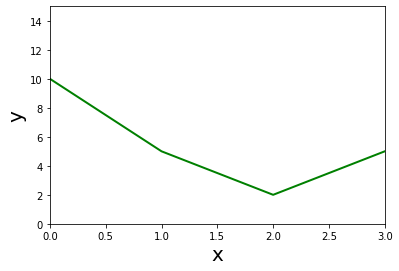

In [152]:
plt.plot([10, 5, 2, 5], color='green', label='line 1', linewidth=2)
plt.ylabel('y', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.axis([0,3,0,15])
plt.show()

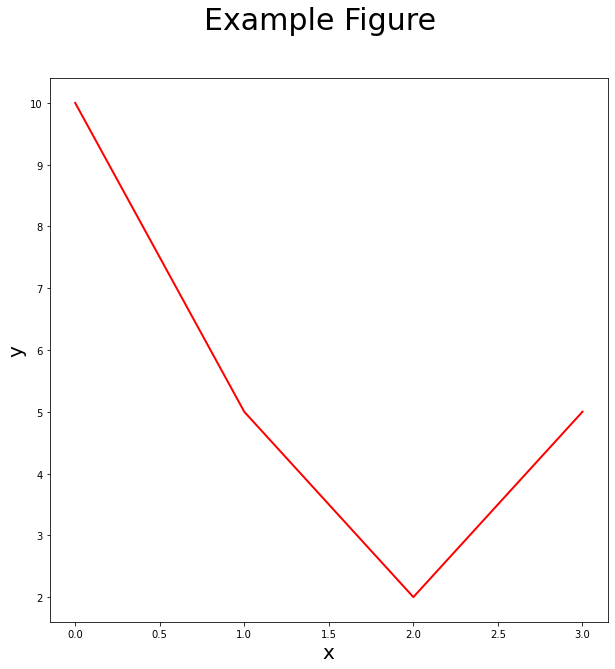

In [155]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
fig.suptitle('Example Figure', fontsize=30)
ax.plot([10, 5, 2, 5], color='red', label='line 1', linewidth=2)
fig.savefig('example_fig.png')

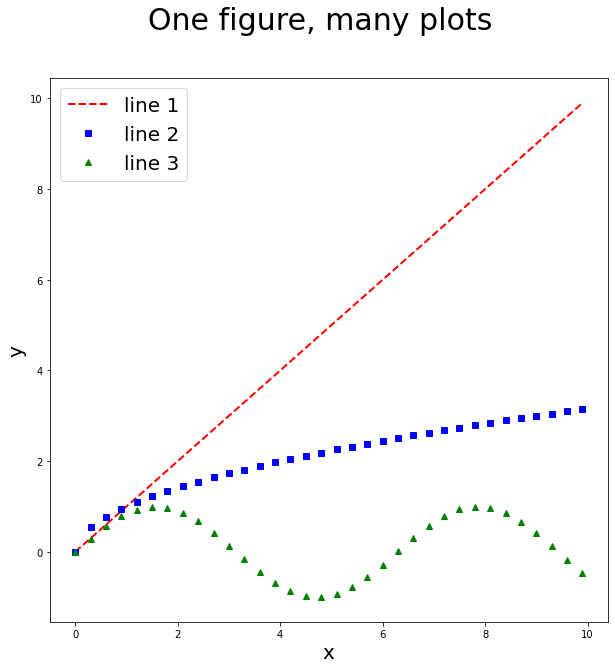

In [160]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
x = np.arange(0., 10., 0.3)

p1 = ax.plot(x, x, 'r--', label="line 1", linewidth=2)
p2 = ax.plot(x, x**0.5, 'bs', label="line 2", linewidth=2)
p3 = ax.plot(x, np.sin(x), 'g^', label="line 3", linewidth=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=20)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
fig.suptitle('One figure, many plots', fontsize=30)

fig.show()

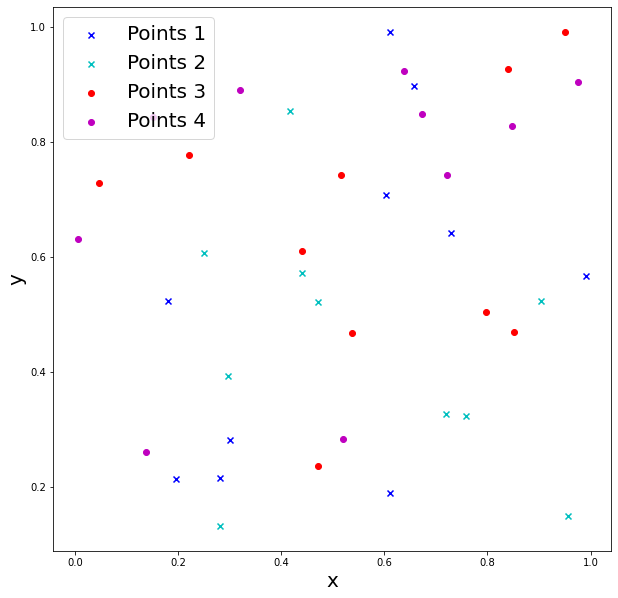

In [164]:
colors = ['b', 'c', 'r', 'm']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

p1 = ax.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[0])
p2 = ax.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[1])
p3 = ax.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[2])
p4 = ax.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[3])

ax.legend((p1, p2, p3, p4), ("Points 1", "Points 2", "Points 3", "Points 4"), fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

fig.show()